# Call libraries

In [ ]:
!pip install numpy==1.25.2
!pip install scikeras
!pip install gensim
!pip install scikit-learn-intelex
!pip install scikit-learn==1.2.2
!pip install gensim
!pip install scikeras
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1

In [ ]:
!pip install mealpy
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.9/397.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math
import statistics as stats
import seaborn
import scipy.sparse
import optuna
import time
import seaborn as sns
import gensim.downloader as api
import torch
import numpy as np
import joblib
import xgboost as xg

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import openpyxl
from openpyxl import Workbook, load_workbook

from pyswarms.single.global_best import GlobalBestPSO
from mealpy import FloatVar, BoolVar, PSO

from transformers import BertTokenizer, BertModel

2025-06-13 03:19:58,489 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


# Input files

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded[fn]))
df
data_train = df
data_train.head()

data=data_train.copy()
print(data.shape)
print(data.isna().sum())

Saving 20250430@DesignChange.Sumaried.AfterPCA.anonymized.xlsx to 20250430@DesignChange.Sumaried.AfterPCA.anonymized.xlsx
User uploaded file "20250430@DesignChange.Sumaried.AfterPCA.anonymized.xlsx" with length 825626 bytes
(503, 15)
Project ID    0
PC1           0
PC2           0
PC3           0
PC4           0
PC5           0
PC6           0
C1            0
C2            0
C3            0
C4            0
C5            0
T1            0
Y1            0
L             0
dtype: int64


In [ ]:
df

,Project ID,PC1,PC2,PC3,PC4,PC5,PC6,C1,C2,C3,C4,C5,T1,Y1,L
0,411011,-2.364032,1.378923,2.890424,-0.410848,-0.261976,-0.161153,Confidential,Turnkey,Sales,Construction,Confidential,december 24 2009 building day 1764 722 uknown ...,72539683,8995
1,411078,-3.347876,-0.978812,2.423644,-0.591772,-1.050878,0.072115,Confidential,Eligible,Redevelopment,Construction,Confidential,october 25 2006 building day 607 810 design ch...,20291166,541
2,411082,-2.636222,-0.727145,2.453174,0.238325,-0.442590,-0.610968,Confidential,Eligible,Rental,Construction,Confidential,october 9 2007 civil engineering day 953 959 d...,28022990,14861
3,411084,-2.959851,1.235995,0.618522,0.773604,-1.298802,0.826293,Confidential,Eligible,Rental,Construction,Confidential,may 9 2007 building day 771 770 change excavat...,27717979,15836
4,411085,-3.358447,-1.550783,2.175083,0.046088,-0.314422,-0.873457,Confidential,Eligible,Rental,Construction,Confidential,october 2 2007 building day 894 810 delay sele...,11147009,7861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,912016,0.566747,-2.814647,-1.300063,-0.741281,0.813225,-0.371160,Confidential,Qualification examination,Sales,electricity,Confidential,july 29 2010 electricity day 421 825 electrici...,12094902,8913
499,912017,0.922994,-3.432486,-0.737737,0.316899,0.865990,0.316298,Confidential,Qualification examination,Sales & Rental,electricity,Confidential,august 26 2010 electricity day 430 806 design ...,13237901,6184
500,1007569,2.998414,-2.959863,0.003853,-1.465737,0.083642,0.810448,Confidential,Lowest price,Rental,Soil Drying,Confidential,august 30 2011 design change day 396 747 delay...,45196037,1360
501,1007570,3.052369,-3.216483,-0.502617,0.513905,0.494815,1.182489,Confidential,Lowest price,Rental,Dry season,Confidential,august 2 2011 design change day 368 747 delay ...,36035166,1304


In [ ]:
text_features = ['T1']
y = 'Y1'
size = 0.5

numerical_feature_name =  ['PC1',
                 'PC2',
                 'PC3',
                 'PC4',
                 'PC5',
                 'PC6']
categorical_features_name =  [
                 'C1',
                 'C2',
                 'C3',
                 'C4',
                 'C5',]

Sentence_feature_names =  ['T1']

encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

one_hot_features = encoder.fit_transform(data[categorical_features_name])
numerical_features = data[numerical_feature_name]

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

T1_embeddings = model.encode(data['T1'].astype(str).tolist())

import scipy.sparse
T1_embeddings_sparse = scipy.sparse.csr_matrix(T1_embeddings)

X_num_oh_word_tfidf = scipy.sparse.hstack((numerical_features, one_hot_features, T1_embeddings_sparse), format='csr')

ClassOut='Y1'
target_name=[ClassOut]
target=data[target_name]
batch = 3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 804.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

2025-06-13 03:59:55,293 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device_name: cpu
2025-06-13 03:59:55,294 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: all-mpnet-base-v2
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
try:
    X_num_oh_word_tfidf
    data
except NameError:
    print("Dummy data for X_num_oh_word_tfidf and data['Y1'] will be created for demonstration.")

    from sklearn.datasets import make_regression
    X_num_oh_word_tfidf, data_y = make_regression(n_samples=1000, n_features=100, random_state=42)
    data = {'Y1': data_y}
    size = 0.2

X_train_full, X_test, y_train_full, y_test = train_test_split(X_num_oh_word_tfidf, data['Y1'], test_size=size, random_state=42)
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

scaler = StandardScaler(with_mean=False)

X_train_scaled_full = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# --- Define Objective Functions for Optuna ---

def objective_lasso(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 100.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=10000, random_state=42)

    # Use cross-validation to evaluate
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train_scaled_full, y_train_full):
        X_train_fold, X_val_fold = X_train_scaled_full[train_index], X_train_scaled_full[val_index]
        y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        mse_scores.append(mean_squared_error(y_val_fold, preds))

    return np.mean(mse_scores)

def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 100.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept, random_state=42)

    # Use cross-validation to evaluate
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train_scaled_full, y_train_full):
        X_train_fold, X_val_fold = X_train_scaled_full[train_index], X_train_scaled_full[val_index]
        y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        mse_scores.append(mean_squared_error(y_val_fold, preds))

    return np.mean(mse_scores)

def objective_gbr(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 6)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train_scaled_full, y_train_full):
        X_train_fold, X_val_fold = X_train_scaled_full[train_index], X_train_scaled_full[val_index]
        y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        mse_scores.append(mean_squared_error(y_val_fold, preds))

    return np.mean(mse_scores)

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train_scaled_full, y_train_full):
        X_train_fold, X_val_fold = X_train_scaled_full[train_index], X_train_scaled_full[val_index]
        y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        mse_scores.append(mean_squared_error(y_val_fold, preds))

    return np.mean(mse_scores)

def objective_meta_lasso(trial, X_train_meta_opt, y_train_full_opt):
    alpha = trial.suggest_float('alpha', 1e-4, 100.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=10000, random_state=42)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train_meta_opt, y_train_full_opt):
        X_train_fold, X_val_fold = X_train_meta_opt[train_index], X_train_meta_opt[val_index]
        y_train_fold, y_val_fold = y_train_full_opt.iloc[train_index], y_train_full_opt.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        mse_scores.append(mean_squared_error(y_val_fold, preds))

    return np.mean(mse_scores)


def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"\n--- Đánh giá {name} ---")
    print(f"Test MSE: {mse}")
    print(f"Test R²: {r2}")
    print(f"Test RMSE: {rmse}")
    print(f"Test MAPE: {mape}")
    return {"Test MSE": mse, "Test R²": r2, "Test RMSE": rmse, "Test MAPE": mape}

# --- Phase 1: Train and Predict (using cross-validation) ---
def train_and_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(X_train.shape[0])
    test_preds = np.zeros(X_test.shape[0])
    for train_index, val_index in kf.split(X_train, y_train):

        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


        if not scipy.sparse.issparse(X_train_fold):
            X_train_fold = scipy.sparse.csr_matrix(X_train_fold)
        if not scipy.sparse.issparse(X_val_fold):
            X_val_fold = scipy.sparse.csr_matrix(X_val_fold)


        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_index] = model.predict(X_val_fold)


        if not scipy.sparse.issparse(X_test):
            X_test_predict = scipy.sparse.csr_matrix(X_test)
        else:
            X_test_predict = X_test

        test_preds += model.predict(X_test_predict) / n_splits
    return oof_preds, test_preds


bayes_opt_results = {
    "Lasso": {},
    "Ridge": {},
    "GBR": {},
    "RF": {},
    "Meta-Lasso": {},
    "Stacking (BayesOpt)": {}
}

print("\n--- Starting Bayesian Optimization ---")
start_time_bo = time.time()

# 1. Lasso
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=50, show_progress_bar=True)
best_params_bo_lasso = study_lasso.best_params
best_lasso_model_bo = Lasso(**best_params_bo_lasso, max_iter=10000, random_state=42)
lasso_oof_preds_bo, lasso_test_preds_bo = train_and_predict(best_lasso_model_bo, X_train_scaled_full, y_train_full, X_test_scaled)

bayes_opt_results["Lasso"] = evaluate_model(y_test, lasso_test_preds_bo, "BayesOpt Lasso")
print(f"Best params for BayesOpt Lasso: {best_params_bo_lasso}")


# 2. Ridge
study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=50, show_progress_bar=True)
best_params_bo_ridge = study_ridge.best_params
best_ridge_model_bo = Ridge(**best_params_bo_ridge, random_state=42)
ridge_oof_preds_bo, ridge_test_preds_bo = train_and_predict(best_ridge_model_bo, X_train_scaled_full, y_train_full, X_test_scaled)

bayes_opt_results["Ridge"] = evaluate_model(y_test, ridge_test_preds_bo, "BayesOpt Ridge")
print(f"Best params for BayesOpt Ridge: {best_params_bo_ridge}")

# 3. Gradient Boosting Regression
study_gbr = optuna.create_study(direction='minimize')
study_gbr.optimize(objective_gbr, n_trials=50, show_progress_bar=True)
best_params_bo_gbr = study_gbr.best_params
best_gbr_model_bo = GradientBoostingRegressor(**best_params_bo_gbr, random_state=42)
gbr_oof_preds_bo, gbr_test_preds_bo = train_and_predict(best_gbr_model_bo, X_train_scaled_full, y_train_full, X_test_scaled)

bayes_opt_results["GBR"] = evaluate_model(y_test, gbr_test_preds_bo, "BayesOpt GBR")
print(f"Best params for BayesOpt GBR: {best_params_bo_gbr}")

# 4. Random Forest Regression
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)
best_params_bo_rf = study_rf.best_params
best_rf_model_bo = RandomForestRegressor(**best_params_bo_rf, random_state=42)
rf_oof_preds_bo, rf_test_preds_bo = train_and_predict(best_rf_model_bo, X_train_scaled_full, y_train_full, X_test_scaled)

bayes_opt_results["RF"] = evaluate_model(y_test, rf_test_preds_bo, "BayesOpt RF")
print(f"Best params for BayesOpt RF: {best_params_bo_rf}")


# Train Meta-Learner (Lasso) with BayesOpt Base Model Predictions

X_train_meta_bo = np.column_stack((lasso_oof_preds_bo, ridge_oof_preds_bo, gbr_oof_preds_bo, rf_oof_preds_bo))
X_test_meta_bo = np.column_stack((lasso_test_preds_bo, ridge_test_preds_bo, gbr_test_preds_bo, rf_test_preds_bo))

study_meta_lasso = optuna.create_study(direction='minimize')
study_meta_lasso.optimize(lambda trial: objective_meta_lasso(trial, X_train_meta_bo, y_train_full), n_trials=20, show_progress_bar=True)
best_params_bo_meta_lasso = study_meta_lasso.best_params
best_meta_learner_bo = Lasso(**best_params_bo_meta_lasso, max_iter=10000, random_state=42)
best_meta_learner_bo.fit(X_train_meta_bo, y_train_full)

final_predictions_bo = best_meta_learner_bo.predict(X_test_meta_bo)

end_time_bo = time.time()
time_bo = end_time_bo - start_time_bo

mse_stacking_bo = mean_squared_error(y_test, final_predictions_bo)
r2_stacking_bo = r2_score(y_test, final_predictions_bo)
rmse_stacking_bo = np.sqrt(mse_stacking_bo)
mape_stacking_bo = mean_absolute_percentage_error(y_test, final_predictions_bo)

bayes_opt_results["Stacking (BayesOpt)"] = {
    "MSE": mse_stacking_bo,
    "R2": r2_stacking_bo,
    "RMSE": rmse_stacking_bo,
    "MAPE": mape_stacking_bo
}

print("\n--- Best Stacking Ensemble (BayesOpt Meta-Learner: Lasso) ---")
print(f"Test MSE (Stacking - BayesOpt): {mse_stacking_bo}")
print(f"Test R² (Stacking - BayesOpt): {r2_stacking_bo}")
print(f"Test RMSE (Stacking - BayesOpt): {rmse_stacking_bo}")
print(f"Test MAPE (Stacking - BayesOpt): {mape_stacking_bo}")
print(f"\nBest parameters for Meta-Learner (Lasso - BayesOpt): {best_params_bo_meta_lasso}")
print(f"Bayesian Optimization Time: {time_bo:.2f} seconds")

[I 2025-06-13 04:14:55,242] A new study created in memory with name: no-name-5e6ab33a-3e88-4580-94ad-a17501acf1ee


(251, 805) (252, 805) (251,) (252,)

--- Starting Bayesian Optimization ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-13 04:14:55,833] Trial 0 finished with value: 63457800428384.42 and parameters: {'alpha': 19.137969437949103, 'fit_intercept': True}. Best is trial 0 with value: 63457800428384.42.
[I 2025-06-13 04:14:56,806] Trial 1 finished with value: 90478203493477.4 and parameters: {'alpha': 0.371602182827439, 'fit_intercept': False}. Best is trial 0 with value: 63457800428384.42.
[I 2025-06-13 04:14:57,752] Trial 2 finished with value: 90470808574787.67 and parameters: {'alpha': 1.4241673270724005, 'fit_intercept': False}. Best is trial 0 with value: 63457800428384.42.
[I 2025-06-13 04:14:58,915] Trial 3 finished with value: 90480767287416.34 and parameters: {'alpha': 0.006800305181005451, 'fit_intercept': False}. Best is trial 0 with value: 63457800428384.42.
[I 2025-06-13 04:14:59,717] Trial 4 finished with value: 63520741987729.336 and parameters: {'alpha': 6.971455511060672, 'fit_intercept': True}. Best is trial 0 with value: 63457800428384.42.
[I 2025-06-13 04:15:00,911] Trial 5 f

[I 2025-06-13 04:15:30,875] A new study created in memory with name: no-name-b1e323a6-ffd4-410d-a845-d213ec2de2e2



--- Đánh giá BayesOpt Lasso ---
Test MSE: 33419513463673.133
Test R²: 0.9171713752856754
Test RMSE: 5780961.292352089
Test MAPE: 0.14740196348430493
Best params for BayesOpt Lasso: {'alpha': 98.83745170598077, 'fit_intercept': True}


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-13 04:15:31,843] Trial 0 finished with value: 172703890517496.22 and parameters: {'alpha': 0.5261021302359159, 'fit_intercept': True}. Best is trial 0 with value: 172703890517496.22.
[I 2025-06-13 04:15:32,878] Trial 1 finished with value: 172502880822138.53 and parameters: {'alpha': 0.008719734041698256, 'fit_intercept': True}. Best is trial 1 with value: 172502880822138.53.
[I 2025-06-13 04:15:33,730] Trial 2 finished with value: 173821674538105.06 and parameters: {'alpha': 0.001343618163581621, 'fit_intercept': False}. Best is trial 1 with value: 172502880822138.53.
[I 2025-06-13 04:15:34,514] Trial 3 finished with value: 173839903548966.22 and parameters: {'alpha': 0.0219057996473909, 'fit_intercept': False}. Best is trial 1 with value: 172502880822138.53.
[I 2025-06-13 04:15:35,070] Trial 4 finished with value: 172514365394558.47 and parameters: {'alpha': 0.040688446433187184, 'fit_intercept': True}. Best is trial 1 with value: 172502880822138.53.
[I 2025-06-13 04:15:35

[I 2025-06-13 04:16:11,513] A new study created in memory with name: no-name-b18747f2-6582-475d-a85f-a0647dca74ce



--- Đánh giá BayesOpt Ridge ---
Test MSE: 83667933340938.0
Test R²: 0.7926331315728858
Test RMSE: 9147017.729344249
Test MAPE: 0.22967294348852121
Best params for BayesOpt Ridge: {'alpha': 0.0008916492126883312, 'fit_intercept': True}


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-13 04:16:50,023] Trial 0 finished with value: 312331761391230.0 and parameters: {'n_estimators': 52, 'learning_rate': 0.0021143954007865917, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.9852735770381397}. Best is trial 0 with value: 312331761391230.0.
[I 2025-06-13 04:17:37,331] Trial 1 finished with value: 123107323880812.16 and parameters: {'n_estimators': 125, 'learning_rate': 0.017359284945085984, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 3, 'subsample': 0.8302321003739463}. Best is trial 1 with value: 123107323880812.16.
[I 2025-06-13 04:18:15,914] Trial 2 finished with value: 113264235673721.6 and parameters: {'n_estimators': 78, 'learning_rate': 0.04314180390535314, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'subsample': 0.72804367807254}. Best is trial 2 with value: 113264235673721.6.
[I 2025-06-13 04:19:15,533] Trial 3 finished with value: 122327557404547.92 and parameters: {'n_estimators': 140, 

[I 2025-06-13 05:06:08,737] A new study created in memory with name: no-name-ae957018-5ba8-476d-905c-34307b9170d8



--- Đánh giá BayesOpt GBR ---
Test MSE: 74544164585201.11
Test R²: 0.8152459448644577
Test RMSE: 8633896.257495865
Test MAPE: 0.2116450232550567
Best params for BayesOpt GBR: {'n_estimators': 168, 'learning_rate': 0.05007931643857036, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.8919093437915274}


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-13 05:07:14,484] Trial 0 finished with value: 143332984139138.44 and parameters: {'n_estimators': 116, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 143332984139138.44.
[I 2025-06-13 05:07:41,908] Trial 1 finished with value: 151458989589417.8 and parameters: {'n_estimators': 64, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 143332984139138.44.
[I 2025-06-13 05:08:14,557] Trial 2 finished with value: 150275722384719.2 and parameters: {'n_estimators': 73, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 143332984139138.44.
[I 2025-06-13 05:09:22,955] Trial 3 finished with value: 145384834445859.62 and parameters: {'n_estimators': 151, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 143332984139138.44.
[I 2025-06-13 05:10:

[I 2025-06-13 06:04:09,792] A new study created in memory with name: no-name-6ade9396-f4b4-4e25-94a7-43261a147c69



--- Đánh giá BayesOpt RF ---
Test MSE: 130526839121030.64
Test R²: 0.676495632276192
Test RMSE: 11424834.314817464
Test MAPE: 0.287920445080347
Best params for BayesOpt RF: {'n_estimators': 120, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.279e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.133e+15, tolerance: 7.369e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.229e+15, tolerance: 6.465e

[I 2025-06-13 06:04:09,886] Trial 0 finished with value: 45398487310202.86 and parameters: {'alpha': 64.85866854264367, 'fit_intercept': False}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:09,906] Trial 1 finished with value: 45544661785050.77 and parameters: {'alpha': 0.38113513658593073, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:09,990] Trial 2 finished with value: 45544661785051.164 and parameters: {'alpha': 0.0004903647115427969, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.983e+15, tolerance: 3.884e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+15, tolerance: 3.714e+13
  model = cd_fast.enet_coordinate_descent(


[I 2025-06-13 06:04:10,010] Trial 3 finished with value: 45544661785051.05 and parameters: {'alpha': 0.0414439394956191, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:10,068] Trial 4 finished with value: 45398487310248.945 and parameters: {'alpha': 0.09005544169398855, 'fit_intercept': False}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:10,088] Trial 5 finished with value: 45544661785001.64 and parameters: {'alpha': 62.35131071118656, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+15, tolerance: 3.884e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+15, tolerance: 3.830e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.249e+15, tolerance: 3.464e

[I 2025-06-13 06:04:10,181] Trial 6 finished with value: 45398487310248.86 and parameters: {'alpha': 0.0011193439035540216, 'fit_intercept': False}. Best is trial 0 with value: 45398487310202.86.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+15, tolerance: 7.437e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+15, tolerance: 7.369e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.802e+15, tolerance: 6.465e

[I 2025-06-13 06:04:10,267] Trial 7 finished with value: 45544661785051.13 and parameters: {'alpha': 0.0010277383454001892, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:10,288] Trial 8 finished with value: 45544661785051.016 and parameters: {'alpha': 0.017119315268680123, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:10,313] Trial 9 finished with value: 45544661785048.55 and parameters: {'alpha': 3.171645708779409, 'fit_intercept': True}. Best is trial 0 with value: 45398487310202.86.
[I 2025-06-13 06:04:10,351] Trial 10 finished with value: 45398487310187.14 and parameters: {'alpha': 86.58373141527522, 'fit_intercept': False}. Best is trial 10 with value: 45398487310187.14.
[I 2025-06-13 06:04:10,393] Trial 11 finished with value: 45398487310189.266 and parameters: {'alpha': 83.75010823236697, 'fit_intercept': False}. Best is trial 10 with value: 45398487310187.14.
[I 2025-06-13 06:04:10,437] Tr

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+14, tolerance: 3.830e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+15, tolerance: 3.464e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+14, tolerance: 3.714e

[I 2025-06-13 06:04:10,604] Trial 15 finished with value: 45398487310248.92 and parameters: {'alpha': 0.5580599365166579, 'fit_intercept': False}. Best is trial 14 with value: 45398487310179.76.
[I 2025-06-13 06:04:10,641] Trial 16 finished with value: 45398487310234.375 and parameters: {'alpha': 20.468468402393448, 'fit_intercept': False}. Best is trial 14 with value: 45398487310179.76.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.460e+13, tolerance: 3.830e+13
  model = cd_fast.enet_coordinate_descent(


[I 2025-06-13 06:04:10,698] Trial 17 finished with value: 45398487310248.06 and parameters: {'alpha': 1.4709892942459932, 'fit_intercept': False}. Best is trial 14 with value: 45398487310179.76.
[I 2025-06-13 06:04:10,747] Trial 18 finished with value: 45398487310235.586 and parameters: {'alpha': 18.843951834060427, 'fit_intercept': False}. Best is trial 14 with value: 45398487310179.76.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.253e+15, tolerance: 3.884e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.037e+15, tolerance: 3.830e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.222e+15, tolerance: 3.464e

[I 2025-06-13 06:04:10,823] Trial 19 finished with value: 45398487310250.4 and parameters: {'alpha': 0.003749509242759081, 'fit_intercept': False}. Best is trial 14 with value: 45398487310179.76.

--- Kết quả Stacking Ensemble Tối ưu (BayesOpt Meta-Learner: Lasso) ---
Test MSE (Stacking - BayesOpt): 23850293266880.402
Test R² (Stacking - BayesOpt): 0.940888218122135
Test RMSE (Stacking - BayesOpt): 4883676.204139706
Test MAPE (Stacking - BayesOpt): 0.11559909067533342

Best parameters for Meta-Learner (Lasso - BayesOpt): {'alpha': 97.10916550995319, 'fit_intercept': False}
Bayesian Optimization Time: 6555.61 seconds


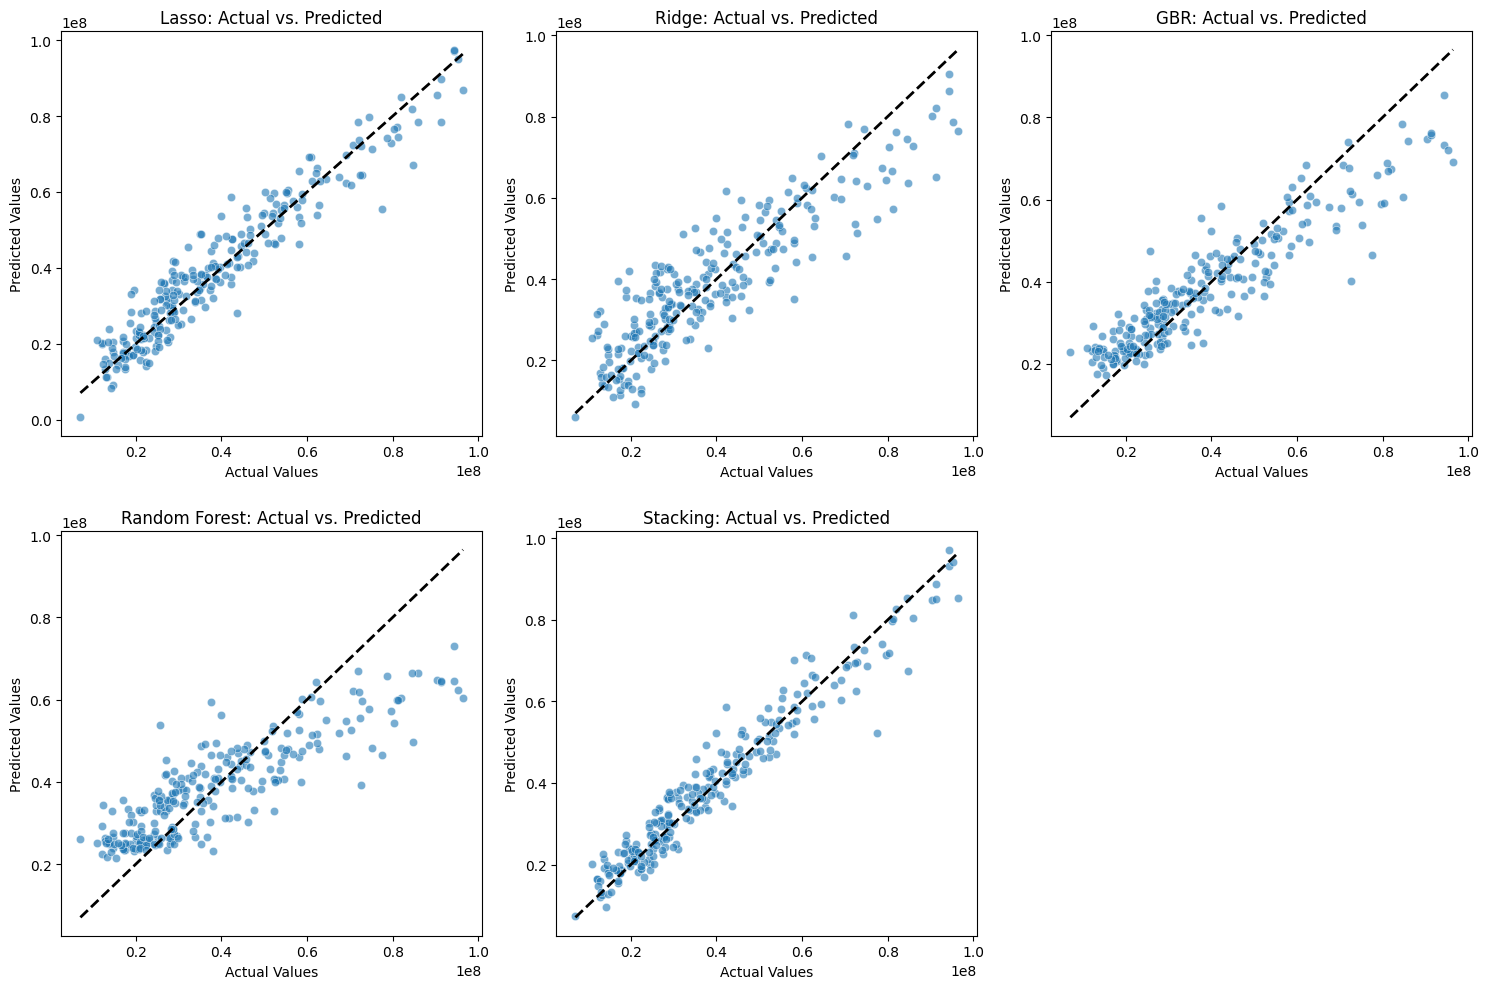

In [ ]:
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Lasso': lasso_test_preds_bo,
    'Ridge': ridge_test_preds_bo,
    'GBR': gbr_test_preds_bo,
    'RF': rf_test_preds_bo,
    'Stacking': final_predictions_bo
})

# Plotting Actual vs. Predicted values for each model
plt.figure(figsize=(15, 10))

# Lasso
plt.subplot(2, 3, 1)
sns.scatterplot(x='Actual', y='Lasso', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Lasso: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Ridge
plt.subplot(2, 3, 2)
sns.scatterplot(x='Actual', y='Ridge', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Ridge: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# GBR
plt.subplot(2, 3, 3)
sns.scatterplot(x='Actual', y='GBR', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('GBR: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# RF
plt.subplot(2, 3, 4)
sns.scatterplot(x='Actual', y='RF', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Stacking
plt.subplot(2, 3, 5)
sns.scatterplot(x='Actual', y='Stacking', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Stacking: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()